In [1]:
import pandas as pd


In [2]:
df=pd.read_excel('/content/Assignment.xlsx')
df

,Article
0,"Retailers, the makers of foods marketed for we..."
1,"Move over, Ozempic — there’s a new drug in tow..."
2,Sept 14 (Reuters) - Bristol Myers Squibb (BMY....
3,Austin Wolcott was 18 years old and pretty sur...
4,"Cancer, often referred to as the “emperor of a..."
5,Nov 28 (Reuters) - The U.S. Food and Drug Admi...
6,Nov 21 (Reuters) - BeiGene (6160.HK) said on T...
7,Sept 19 (Reuters) - Drugmaker BeiGene (6160.HK...
8,BRUKINSA is the first and only BTK inhibitor a...
9,Whether you're looking for a quick bite to eat...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  25 non-null     object
dtypes: object(1)
memory usage: 328.0+ bytes


Data pre-processing

In [3]:
import re
from textblob import TextBlob  # For sentiment analysis

# Function to clean up articles
def clean_article(article):
    # Remove punctuation
    cleaned_article = re.sub(r'[^\w\s]', '', article)
    # Convert to lowercase
    cleaned_article = cleaned_article.lower()
    # Remove common words (optional)
    common_words = ['the', 'and', 'a', 'is', 'in', 'it', 'of', 'for', 'on', 'to', 'this', 'that', 'with', 'at', 'an', 'are', 'by']
    cleaned_article = ' '.join(word for word in cleaned_article.split() if word not in common_words)
    return cleaned_article

# # Function to check the mood of an article
# def check_mood(article):
#     blob = TextBlob(article)
#     polarity = blob.sentiment.polarity
#     if polarity > 0:
#         return "Positive"
#     elif polarity < 0:
#         return "Negative"
#     else:
#         return "Neutral"

In [4]:
from transformers import pipeline

# Specify the model and revision
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
revision = "af0f99b"

# Load sentiment analysis pipeline using BERT with specified model and revision
sentiment_analysis = pipeline("sentiment-analysis", model=model_name, revision=revision)

# Function to check the mood of an article using BERT-based sentiment analysis
def check_mood(article):
    # Split the article into smaller segments
    max_segment_length = 512  # Maximum segment length supported by BERT
    segments = [article[i:i+max_segment_length] for i in range(0, len(article), max_segment_length)]

    # Perform sentiment analysis on each segment
    sentiment_scores = []
    for segment in segments:
        result = sentiment_analysis(segment)[0]
        if result['label'] == 'POSITIVE':
            sentiment_scores.append(1)
        elif result['label'] == 'NEGATIVE':
            sentiment_scores.append(-1)
        else:
            sentiment_scores.append(0)

    # Aggregate sentiment scores
    overall_sentiment = sum(sentiment_scores)

    # Classify mood based on aggregated sentiment
    if overall_sentiment > 0:
        return "Positive"
    elif overall_sentiment < 0:
        return "Negative"
    else:
        return "Neutral"


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [9]:
# Example usage
article = "Scientists develop a new solar panel that's more efficient than ever before. This could help us fight climate change!"
print(check_mood(article))


Positive


In [6]:
exa="The economy is struggling, and many people are losing their jobs. This is a worrying trend"
print(check_mood(exa))

Negative


In [7]:
# Example usage
example_1 = "A new report details the latest scientific findings on climate change. The report is informative and well-written."
example_2 = "The weather today is neither too hot nor too cold."

print(check_mood(example_1))
print(check_mood(example_2))

Positive
Negative


In [8]:
# Test example
example_2 = "A new report details the latest scientific findings on climate change. The report is informative and well-written."
print(check_mood(example_2))


Positive


In [9]:
ex="The weather today is neither too hot nor too cold."
print(check_mood(ex))

Negative


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

def find_connections(articles, num_topics=3, num_top_words=5):
    # Create TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(articles)

    # Fit NMF model
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(tfidf)

    # Print the topics
    print("Topics found via NMF:")
    for topic_idx, topic in enumerate(nmf_model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print()



In [9]:
# Apply cleaning function to the 'Article' column
df['Cleaned_Article'] = df['Article'].apply(clean_article)

# Apply mood check function to the 'Cleaned_Article' column
df['Mood'] = df['Cleaned_Article'].apply(check_mood)


In [14]:
df['Mood'].value_counts()

Mood
Negative    19
Positive     4
Neutral      2
Name: count, dtype: int64

In [45]:
df.describe()

,Article,Cleaned_Article,Mood
count,25,25,25
unique,25,25,3
top,"Retailers, the makers of foods marketed for we...",retailers makers foods marketed weight loss ot...,Negative
freq,1,1,19


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Article          25 non-null     object
 1   Cleaned_Article  25 non-null     object
 2   Mood             25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [17]:
# Define mapping dictionary
mood_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

# Apply mapping to the "Mood" column
df['Mood_encoded'] = df['Mood'].map(mood_mapping)

# Convert encoded labels to numpy array
mood_labels_array = df['Mood_encoded'].values


In [18]:
df

,Article,Cleaned_Article,Mood,Mood_encoded
0,"Retailers, the makers of foods marketed for we...",retailers makers foods marketed weight loss ot...,Negative,0
1,"Move over, Ozempic — there’s a new drug in tow...",move over ozempic theres new drug town eli lil...,Negative,0
2,Sept 14 (Reuters) - Bristol Myers Squibb (BMY....,sept 14 reuters bristol myers squibb bmyn said...,Negative,0
3,Austin Wolcott was 18 years old and pretty sur...,austin wolcott was 18 years old pretty sure he...,Negative,0
4,"Cancer, often referred to as the “emperor of a...",cancer often referred as emperor all maladies ...,Positive,2
5,Nov 28 (Reuters) - The U.S. Food and Drug Admi...,nov 28 reuters us food drug administration fda...,Negative,0
6,Nov 21 (Reuters) - BeiGene (6160.HK) said on T...,nov 21 reuters beigene 6160hk said tuesday has...,Negative,0
7,Sept 19 (Reuters) - Drugmaker BeiGene (6160.HK...,sept 19 reuters drugmaker beigene 6160hk said ...,Negative,0
8,BRUKINSA is the first and only BTK inhibitor a...,brukinsa first only btk inhibitor approved fol...,Negative,0
9,Whether you're looking for a quick bite to eat...,whether youre looking quick bite eat sitdown e...,Negative,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Article          25 non-null     object
 1   Cleaned_Article  25 non-null     object
 2   Mood             25 non-null     object
 3   Mood_encoded     25 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [24]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [12]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# # Read the data
# df = pd.read_excel('/content/Processed_Articles.xlsx')

# Define features and target
X = df['Cleaned_Article']
y = df['Mood_encoded']

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
X_tokenized = [" ".join([word for word in word_tokenize(article.lower()) if word not in stop_words]) for article in X]

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_tokenized)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Example: Predict mood for a new article
new_article = "The company reported strong earnings, leading to a surge in its stock price."
cleaned_new_article = " ".join([word for word in word_tokenize(new_article.lower()) if word not in stop_words])
new_article_vectorized = vectorizer.transform([cleaned_new_article])
predicted_mood = model.predict(new_article_vectorized)
print("Predicted Mood:", predicted_mood[0])


Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Predicted Mood: 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
print("X_train size:", X_train.size())
print("attention_masks size:", attention_masks.size())
print("y_train size:", y_train.size())


X_train size: torch.Size([20, 128])
attention_masks size: torch.Size([25, 128])
y_train size: torch.Size([20])


EDA

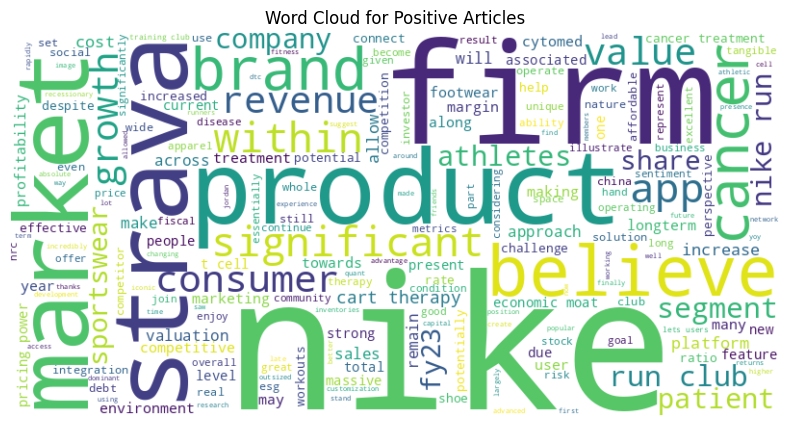

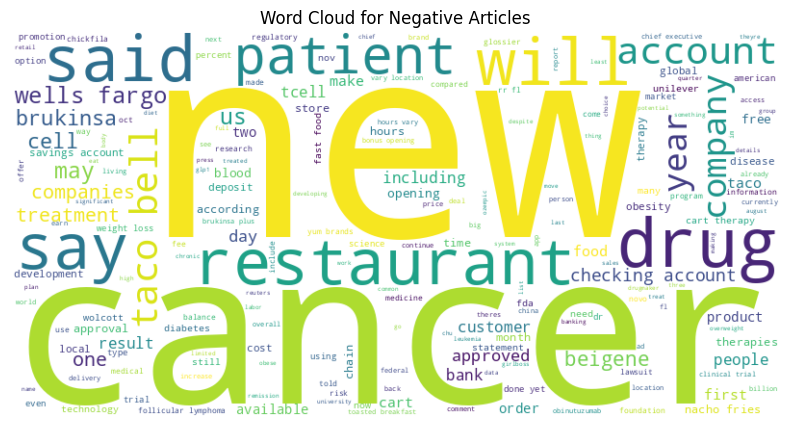

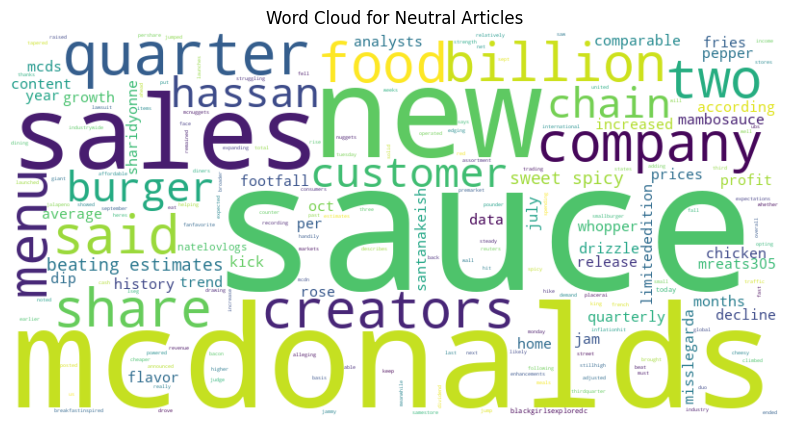

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a given mood
def generate_wordcloud(df, mood):
    # Combine all articles of the specified mood into a single string
    text = ' '.join(df[df['Mood'] == mood]['Cleaned_Article'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

    # Display the generated word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {mood} Articles")
    plt.axis('off')
    plt.show()

# Generate word clouds for positive, negative, and neutral articles
generate_wordcloud(df, 'Positive')
generate_wordcloud(df, 'Negative')
generate_wordcloud(df, 'Neutral')


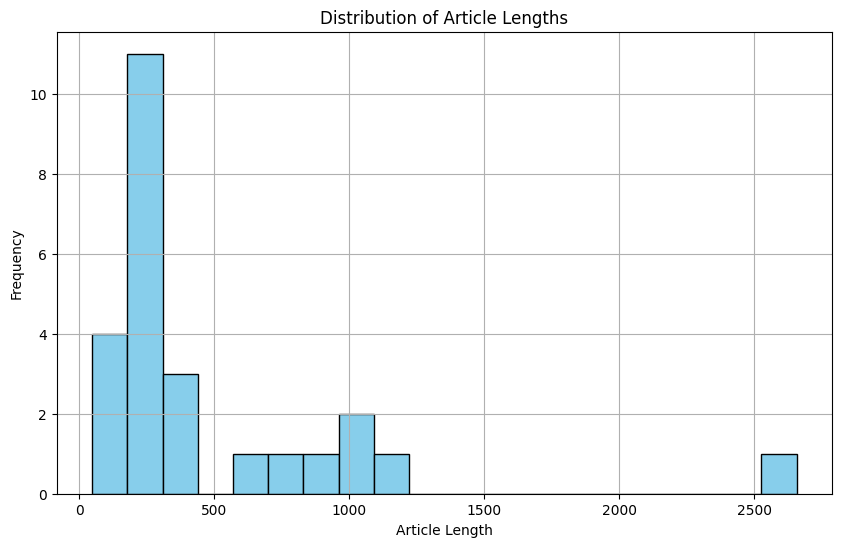

In [48]:
# Calculate article lengths
df['Article_Length'] = df['Cleaned_Article'].apply(lambda x: len(x.split()))

# Plot histogram of article lengths
plt.figure(figsize=(10, 6))
plt.hist(df['Article_Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


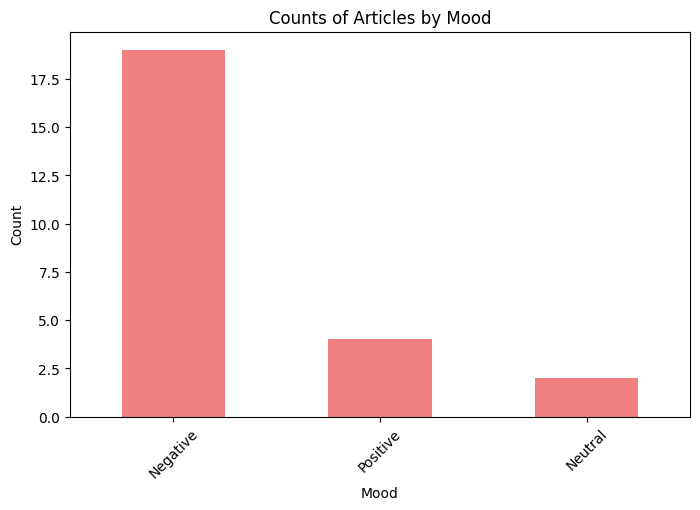

In [49]:

# Plot bar plot of mood counts
plt.figure(figsize=(8, 5))
df['Mood'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Counts of Articles by Mood')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


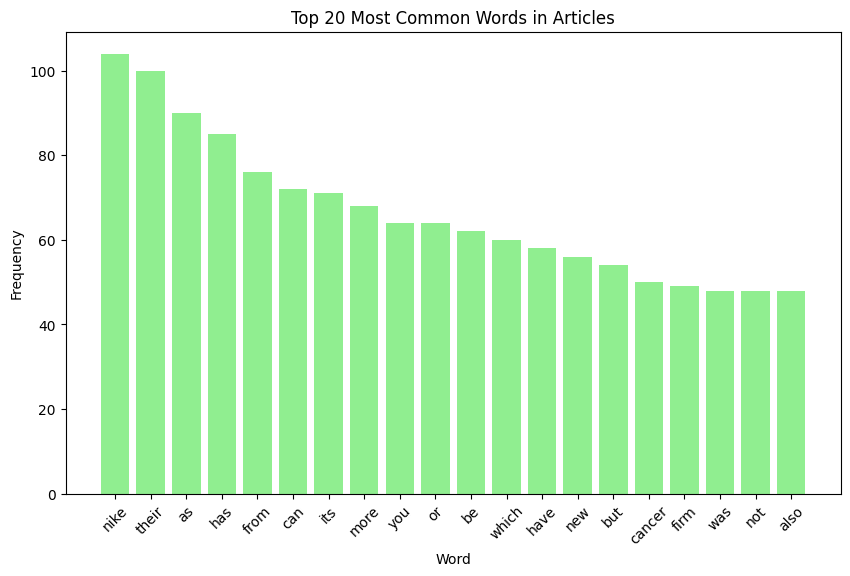

In [50]:
# Word Frequency Analysis

from collections import Counter

# Tokenize words and count frequencies
all_words = ' '.join(df['Cleaned_Article']).split()
word_freq = Counter(all_words)

# Get top 20 most common words
top_words = word_freq.most_common(20)

# Plot bar plot of top 20 most common words
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='lightgreen')
plt.title('Top 20 Most Common Words in Articles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


model

In [ ]:
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

# # Load pre-trained BERT model and tokenizer
# model_name = "bert-base-uncased"
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# # Tokenize text data and convert to PyTorch tensors
# tokenized_inputs = tokenizer(df['Cleaned_Article'].tolist(), padding=True, truncation=True, return_tensors="pt", max_length=512)
# labels = torch.tensor(df['Mood'].map({'Positive': 2, 'Neutral': 1, 'Negative': 0}).tolist())

# # Split the data into training and testing sets
# train_inputs, test_inputs, train_labels, test_labels = train_test_split(tokenized_inputs.input_ids, labels, test_size=0.2, random_state=42)

# # Fine-tune the pre-trained model
# optimizer = AdamW(model.parameters(), lr=1e-5)
# batch_size = 16
# num_epochs = 3
# num_batches = len(train_inputs) // batch_size
# for epoch in range(num_epochs):
#     for i in range(num_batches):
#         start_idx = i * batch_size
#         end_idx = (i + 1) * batch_size
#         optimizer.zero_grad()
#         outputs = model(input_ids=train_inputs[start_idx:end_idx],
#                         attention_mask=tokenized_inputs.attention_mask[start_idx:end_idx],
#                         labels=train_labels[start_idx:end_idx])
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()

# # Evaluate the fine-tuned model
# model.eval()
# with torch.no_grad():
#     outputs = model(input_ids=test_inputs, attention_mask=tokenized_inputs.attention_mask[test_inputs])
#     predictions = torch.argmax(outputs.logits, dim=1)

# # Convert labels back to original format
# test_labels_original = [key for key, value in {'Positive': 2, 'Neutral': 1, 'Negative': 0}.items() for label in test_labels if value == label]

# # Print classification report
# print(classification_report(test_labels_original, predictions, target_names=['Negative', 'Neutral', 'Positive']))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



# Define features and target
X = df['Cleaned_Article']
y_encoded = df['Mood_encoded']

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
X_tokenized = [" ".join([word for word in word_tokenize(article.lower()) if word not in stop_words]) for article in X]

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_tokenized)

# Split data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train_encoded)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with best parameters
best_model = grid_search.best_estimator_
y_pred_encoded = best_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("Accuracy:", accuracy)





Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8


In [32]:
print(classification_report(y_test_encoded, y_pred_encoded))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Map predicted mood encodings to mood categories
def map_encoded_to_mood(encoded_value):
    if encoded_value == 0:
        return "Negative"
    elif encoded_value == 1:
        return "Neutral"
    elif encoded_value == 2:
        return "Positive"

# Map predicted mood encodings to mood categories
y_pred = [map_encoded_to_mood(encoded_value) for encoded_value in y_pred_encoded]

# Example: Predict mood for a new article
new_article = "The company reported strong earnings, leading to a surge in its stock price."
cleaned_new_article = " ".join([word for word in word_tokenize(new_article.lower()) if word not in stop_words])
new_article_vectorized = vectorizer.transform([cleaned_new_article])
predicted_mood_encoded = best_model.predict(new_article_vectorized)[0]
predicted_mood = map_encoded_to_mood(predicted_mood_encoded)
print("Predicted Mood:", predicted_mood)


Predicted Mood: Negative


In [34]:
from google.colab import files
import pickle

# Save the trained model to a file using pickle
with open('best_logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Download the saved model file
files.download('best_logistic_regression_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>